A simple 2D grid dataset, like the one used in 
[How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/), based on the R code in
[snedata](https://github.com/jlmelville/snedata).

In [ ]:
import numpy as np
import pandas as pd


def linear_map(x: np.ndarray, from_: float = 0.0, to: float = 1.0) -> np.ndarray:
    """
    Map a 1D array x linearly to the range [from_, to].
    """
    x = np.asarray(x, dtype=np.float64)
    xmin = x.min()
    xmax = x.max()
    span = xmax - xmin

    return (x - xmin) / span * (to - from_) + from_


def grid_data(n: int = 10) -> tuple[np.ndarray, pd.DataFrame]:
    """
    Create a 2D square grid with color mapping similar to the R version.

    Returns
    -------
    coords : np.ndarray, shape (n*n, 2)
        The x and y coordinates.
    colors : pd.DataFrame, shape (n*n, 1)
        One-column DataFrame with hex color strings.
    """
    # Create grid like expand.grid(1:n, 1:n) in R
    xs, ys = np.meshgrid(np.arange(1, n + 1), np.arange(1, n + 1))
    coords = np.column_stack([xs.ravel(), ys.ravel()])  # columns: x, y

    # Map x and y to [0, 255] and floor
    g = np.floor(linear_map(coords[:, 0], 0, 255)).astype(int)
    b = np.floor(linear_map(coords[:, 1], 0, 255)).astype(int)

    # Constant red channel = 20
    r = 20
    hex_colors = ["#{:02X}{:02X}{:02X}".format(r, gi, bi) for gi, bi in zip(g, b)]

    color_df = pd.DataFrame({"color": hex_colors})

    return np.hstack([coords, np.zeros((coords.shape[0], 1))]), color_df

In [2]:
coords, color_df = grid_data(20)
coords, color_df

(array([[ 1.,  1.,  0.],
        [ 2.,  1.,  0.],
        [ 3.,  1.,  0.],
        ...,
        [18., 20.,  0.],
        [19., 20.,  0.],
        [20., 20.,  0.]]),
        color
 0    #140000
 1    #140D00
 2    #141A00
 3    #142800
 4    #143500
 ..       ...
 395  #14C9FF
 396  #14D6FF
 397  #14E4FF
 398  #14F1FF
 399  #14FFFF
 
 [400 rows x 1 columns])

In [3]:
from drnb.io.pipeline import create_default_pipeline

data_result = create_default_pipeline(check_for_duplicates=True).run(
    "grid2d",
    data=coords,
    target=color_df,
    tags=["synthetic", "lowdim", "small"],
    url="http://distill.pub/2016/misread-tsne/",
    verbose=True,
)

[22:36:10] INFO     Requesting one extra neighbor to account for self-neighbor        ]8;id=103158;file:///home/james/dev/drnb-plugin/src/drnb/neighbors/compute.py\compute.py]8;;\:]8;id=808919;file:///home/james/dev/drnb-plugin/src/drnb/neighbors/compute.py#613\613]8;;\

           INFO     Initial data shape: (400, 3)                                      ]8;id=393767;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=960678;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#83\83]8;;\

           INFO     Keeping all columns                                             ]8;id=589723;file:///home/james/dev/drnb-plugin/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=657658;file:///home/james/dev/drnb-plugin/src/drnb/preprocess.py#90\90]8;;\

           INFO     Data shape after filtering columns: (400, 3)                     ]8;id=35039;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=746684;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#164\164]8;;\

           INFO     Removing rows with NAs                                           ]8;id=666625;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=87102;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#145\145]8;;\

           INFO     Data shape after filtering NAs: (400, 3)                         ]8;id=986478;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=958595;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#156\156]8;;\

           INFO     Checked for duplicates: found 0                                  ]8;id=343559;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=934531;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#172\172]8;;\

           INFO     Converting to numpy with {'dtype': 'float32', 'layout': 'c'}     ]8;id=182765;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=983918;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#187\187]8;;\

           INFO     Writing data for grid2d                                          ]8;id=801895;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=970263;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#298\298]8;;\

           INFO     Exporting data of type ndarray to npy                            ]8;id=202430;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=189234;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#659\659]8;;\

[22:36:11] INFO     Exporting data of type ndarray to csv                            ]8;id=750295;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=594366;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#659\659]8;;\

           INFO     Processing target with initial shape (400, 1)                    ]8;id=836805;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=21552;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#243\243]8;;\

           INFO     Keeping all columns                                             ]8;id=597889;file:///home/james/dev/drnb-plugin/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=539131;file:///home/james/dev/drnb-plugin/src/drnb/preprocess.py#90\90]8;;\

           INFO     Writing target for grid2d                                        ]8;id=523975;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=351393;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#298\298]8;;\

           INFO     Exporting data of type DataFrame to feather                      ]8;id=695552;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=635118;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#659\659]8;;\

           INFO     Exporting data of type DataFrame to csv                          ]8;id=648628;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=456839;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#659\659]8;;\

           INFO     Calculating nearest neighbors                                    ]8;id=323772;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=11061;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#317\317]8;;\

[22:36:15] INFO     Using 'faiss' to find nearest neighbors                           ]8;id=86021;file:///home/james/dev/drnb-plugin/src/drnb/neighbors/compute.py\compute.py]8;;\:]8;id=674385;file:///home/james/dev/drnb-plugin/src/drnb/neighbors/compute.py#263\263]8;;\

           INFO     Finding 151 neighbors using plugin faiss with euclidean metric    ]8;id=524779;file:///home/james/dev/drnb-plugin/src/drnb/neighbors/compute.py\compute.py]8;;\:]8;id=817615;file:///home/james/dev/drnb-plugin/src/drnb/neighbors/compute.py#123\123]8;;\
                    and params: {'use_gpu': True}                                                   

           INFO     [nn-plugin:faiss] launching: /home/james/.local/bin/uv run       ]8;id=908928;file:///home/james/dev/drnb-plugin/src/drnb/nnplugins/external.py\external.py]8;;\:]8;id=791663;file:///home/james/dev/drnb-plugin/src/drnb/nnplugins/external.py#188\188]8;;\
                    --color never --quiet drnb-nn-plugin-run.py --method faiss                      
                    --request /tmp/drnb-nn-faiss-zzos4dvq/request.json                              

           INFO     [faiss] request metric=euclidean n_neighbors=151                 ]8;id=159474;file:///home/james/dev/drnb-plugin/src/drnb/nnplugins/external.py\external.py]8;;\:]8;id=389078;file:///home/james/dev/drnb-plugin/src/drnb/nnplugins/external.py#287\287]8;;\

           INFO     [faiss] params={'use_gpu': True}                                 ]8;id=864154;file:///home/james/dev/drnb-plugin/src/drnb/nnplugins/external.py\external.py]8;;\:]8;id=797353;file:///home/james/dev/drnb-plugin/src/drnb/nnplugins/external.py#287\287]8;;\

[22:36:16] INFO     Writing numpy format to                                          ]8;id=834203;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=794206;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#432\432]8;;\
                    nn/grid2d.16.euclidean.exact.faiss.idx.npy                                      

           INFO     Writing csv format to nn/grid2d.16.euclidean.exact.faiss.idx.csv ]8;id=875976;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=829897;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#404\404]8;;\

           INFO     Writing numpy format to                                          ]8;id=522413;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=207415;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#432\432]8;;\
                    nn/grid2d.16.euclidean.exact.faiss.dist.npy                                     

           INFO     Writing csv format to                                            ]8;id=839979;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=387501;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#404\404]8;;\
                    nn/grid2d.16.euclidean.exact.faiss.dist.csv                                     

           INFO     Writing numpy format to                                          ]8;id=258410;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=414328;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#432\432]8;;\
                    nn/grid2d.51.euclidean.exact.faiss.idx.npy                                      

           INFO     Writing csv format to nn/grid2d.51.euclidean.exact.faiss.idx.csv ]8;id=726864;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=192156;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#404\404]8;;\

           INFO     Writing numpy format to                                          ]8;id=932429;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=123574;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#432\432]8;;\
                    nn/grid2d.51.euclidean.exact.faiss.dist.npy                                     

           INFO     Writing csv format to                                            ]8;id=983221;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=281411;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#404\404]8;;\
                    nn/grid2d.51.euclidean.exact.faiss.dist.csv                                     

           INFO     Writing numpy format to                                          ]8;id=823088;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=786372;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#432\432]8;;\
                    nn/grid2d.151.euclidean.exact.faiss.idx.npy                                     

           INFO     Writing csv format to                                            ]8;id=17848;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=505157;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#404\404]8;;\
                    nn/grid2d.151.euclidean.exact.faiss.idx.csv                                     

[22:36:17] INFO     Writing numpy format to                                          ]8;id=180371;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=528228;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#432\432]8;;\
                    nn/grid2d.151.euclidean.exact.faiss.dist.npy                                    

           INFO     Writing csv format to                                            ]8;id=712848;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=835706;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#404\404]8;;\
                    nn/grid2d.151.euclidean.exact.faiss.dist.csv                                    

           INFO     Calculating triplets                                             ]8;id=780283;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=947703;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#331\331]8;;\

[22:36:18] INFO     Writing csv format to triplets/grid2d.5.1337.idx.csv             ]8;id=699120;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=76411;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#404\404]8;;\

           INFO     Writing csv format to triplets/grid2d.5.1337.euclidean.csv       ]8;id=720859;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=697209;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#404\404]8;;\

           INFO     Writing numpy format to triplets/grid2d.5.1337.idx.npy           ]8;id=931604;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=129273;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#432\432]8;;\

           INFO     Writing numpy format to triplets/grid2d.5.1337.euclidean.npy     ]8;id=392902;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=9347;file:///home/james/dev/drnb-plugin/src/drnb/io/__init__.py#432\432]8;;\

           INFO     Writing pipeline result for grid2d                               ]8;id=767577;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=15519;file:///home/james/dev/drnb-plugin/src/drnb/io/pipeline.py#134\134]8;;\

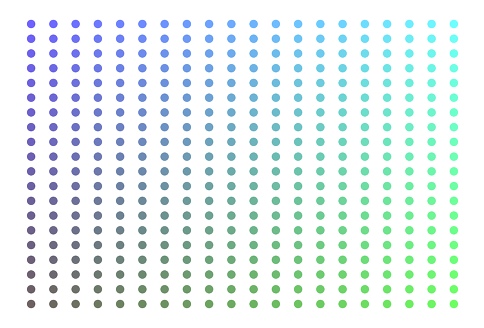

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(1.0), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=1.0, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(1.0), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(1.0), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(1.0), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [4]:
import drnb.embed.pipeline as pl

pl.standard_eval(
    method="pca",
    dataset="grid2d",
)